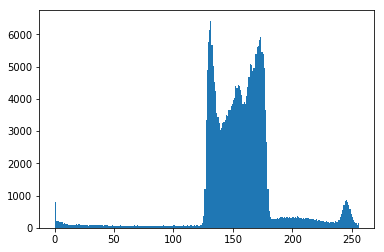

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test.jpg',0)
imgColor= cv2.imread('test.jpg')
cv2.imshow('Sample image',imgColor)
plt.hist(img.ravel(),256,[0,256]); plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()


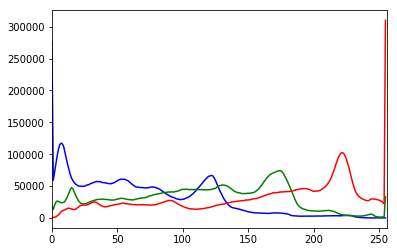

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('colors.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr=cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])
plt.show()


In [24]:
# self written function
# this doesnot uses matplot lib to plot the curve, instead uses 
# open cv to do all the calculations

import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('test.jpg',0)
hist = np.bincount(img.ravel(),minlength=256) # 10x faster than np.histogram
mask=np.zeros((500,500))
#tuple
pt=(0,0)
for pt2 in enumerate(hist):
    cv2.line(mask,pt,pt2,100,3)
    pt=pt2
cv2.imshow('Histogram',mask)
cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
    

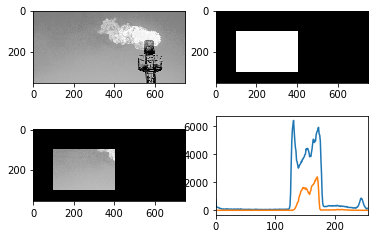

In [37]:
# # masking and making histogram of a specific part of the image
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# img = cv2.imread('test.jpg',0)

# print mask.shape
# # mask=np.zeros(img.shape)
# mask[100:200,100:300]=255
# dst=np.zeros((1000,1000))
# maskedImage=cv2.bitwise_and(img,img,mask=mask)

# hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
# hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

# plt.subplot(221), plt.imshow(img, 'gray')
# plt.subplot(222), plt.imshow(mask,'gray')
# plt.subplot(223), plt.imshow(masked_img, 'gray')
# plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
# plt.xlim([0,256])

# plt.show()

# # end

img = cv2.imread('test.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()




In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('pegion.jpg',0)
# img = cv2.imread('test.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

cv2.imshow('res.png',res)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [51]:
import numpy as np
import cv2

img = cv2.imread('pegion.jpg',0)

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cl1=np.hstack((img,cl1))
# cv2.imwrite('clahe_2.jpg',cl1)
cv2.imshow('res.png',cl1)
cv2.waitKey(0)
cv2.destroyAllWindows()

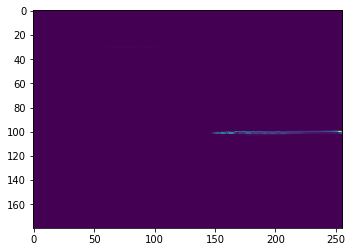

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

plt.imshow(hist,interpolation = 'nearest')
plt.show()

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#roi is the object or region of object we need to find
roi = cv2.imread('rose_red.png')
hsv = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

#target is the image we search in
target = cv2.imread('rose.png')
hsvt = cv2.cvtColor(target,cv2.COLOR_BGR2HSV)

# taken the red of a rose and a complete rose. Then we converted each image to hsv
# now it is time to calculate the histograms for each of the images

M = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
I = cv2.calcHist([hsvt],[0, 1], None, [180, 256], [0, 180, 0, 256] )

R=M/I
h,s,v=cv2.split(hsvt) # why do the image didnot have [hsvt] instead of hsvt



C:\Users\80LM0141IH\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in divide
C:\Users\80LM0141IH\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in divide


In [70]:
import cv2
import numpy as np

roi=cv2.imread('grass.jpg')
hand=cv2.imread('football.jpg')

roi_hsv=cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)
hand_hsv=cv2.cvtColor(hand,cv2.COLOR_BGR2HSV)

# draw histograms of both of the images and then do the magic
roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hand_hsv],[0,1],roihist,[0,180,0,256],1)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
cv2.filter2D(dst,-1,disc,dst)

# threshold and binary AND
ret,thresh = cv2.threshold(dst,50,255,0)
thresh = cv2.merge((thresh,thresh,thresh))
res = cv2.bitwise_and(hand,thresh)

res = np.vstack((thresh,res))
# cv2.imwrite('res.jpg',res)
cv2.imshow('result',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

# lets convolute using single disk? But why ? dst is what?